<a href="https://colab.research.google.com/github/MaryMbugua109/MaryMbugua109/blob/main/Dataset2_The_Naive_Bayes_Classifier_MaryMbugua_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Using Naive Bayes Classifier to clasify whether a message is spam or not.

### b) Defining the Metric for Success

> The Naive Bayes should give an accuracy of prediction that is beyond resonable doubt.

### d) Recording the Experimental Design

> Importing our libraries

> Perfom EDA

>Naive Bayes Classifier

#Importing our libraries

In [9]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

## 2. Reading the Data

In [10]:
#Loading the dataset to our working directory
spam=pd.read_csv('/content/spambase.data')
spam

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0




## 3. Checking the Data

In [11]:
# Determining the no. of records in our dataset
#
spam.shape

(4600, 58)

In [12]:
# Previewing the top of our dataset
spam.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [13]:
# Previewing the bottom of our dataset
# 
spam.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [14]:
# Checking whether each column has an appropriate datatype
#
spam.dtypes

0         float64
0.64      float64
0.64.1    float64
0.1       float64
0.32      float64
0.2       float64
0.3       float64
0.4       float64
0.5       float64
0.6       float64
0.7       float64
0.64.2    float64
0.8       float64
0.9       float64
0.10      float64
0.32.1    float64
0.11      float64
1.29      float64
1.93      float64
0.12      float64
0.96      float64
0.13      float64
0.14      float64
0.15      float64
0.16      float64
0.17      float64
0.18      float64
0.19      float64
0.20      float64
0.21      float64
0.22      float64
0.23      float64
0.24      float64
0.25      float64
0.26      float64
0.27      float64
0.28      float64
0.29      float64
0.30      float64
0.31      float64
0.32.2    float64
0.33      float64
0.34      float64
0.35      float64
0.36      float64
0.37      float64
0.38      float64
0.39      float64
0.40      float64
0.41      float64
0.42      float64
0.778     float64
0.43      float64
0.44      float64
3.756     float64
61        

## 4. External Data Source Validation

> I have cross_checked data with kaggle spam collection dataset available in [https://www.kaggle.com/uciml/sms-spam-collection-dataset]

## 5. Tidying the Dataset

In [15]:
# Checking for Outliers
#
Q1 = spam.quantile(0.25)
Q3 =spam.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0           0.00000
0.64        0.00000
0.64.1      0.42000
0.1         0.00000
0.32        0.38250
0.2         0.00000
0.3         0.00000
0.4         0.00000
0.5         0.00000
0.6         0.16000
0.7         0.00000
0.64.2      0.80000
0.8         0.00000
0.9         0.00000
0.10        0.00000
0.32.1      0.10000
0.11        0.00000
1.29        0.00000
1.93        2.64000
0.12        0.00000
0.96        1.27000
0.13        0.00000
0.14        0.00000
0.15        0.00000
0.16        0.00000
0.17        0.00000
0.18        0.00000
0.19        0.00000
0.20        0.00000
0.21        0.00000
0.22        0.00000
0.23        0.00000
0.24        0.00000
0.25        0.00000
0.26        0.00000
0.27        0.00000
0.28        0.00000
0.29        0.00000
0.30        0.00000
0.31        0.00000
0.32.2      0.00000
0.33        0.00000
0.34        0.00000
0.35        0.00000
0.36        0.11000
0.37        0.00000
0.38        0.00000
0.39        0.00000
0.40        0.00000
0.41        0.18800


>We have a few outliers. so we will plot a box plot to visualize them.

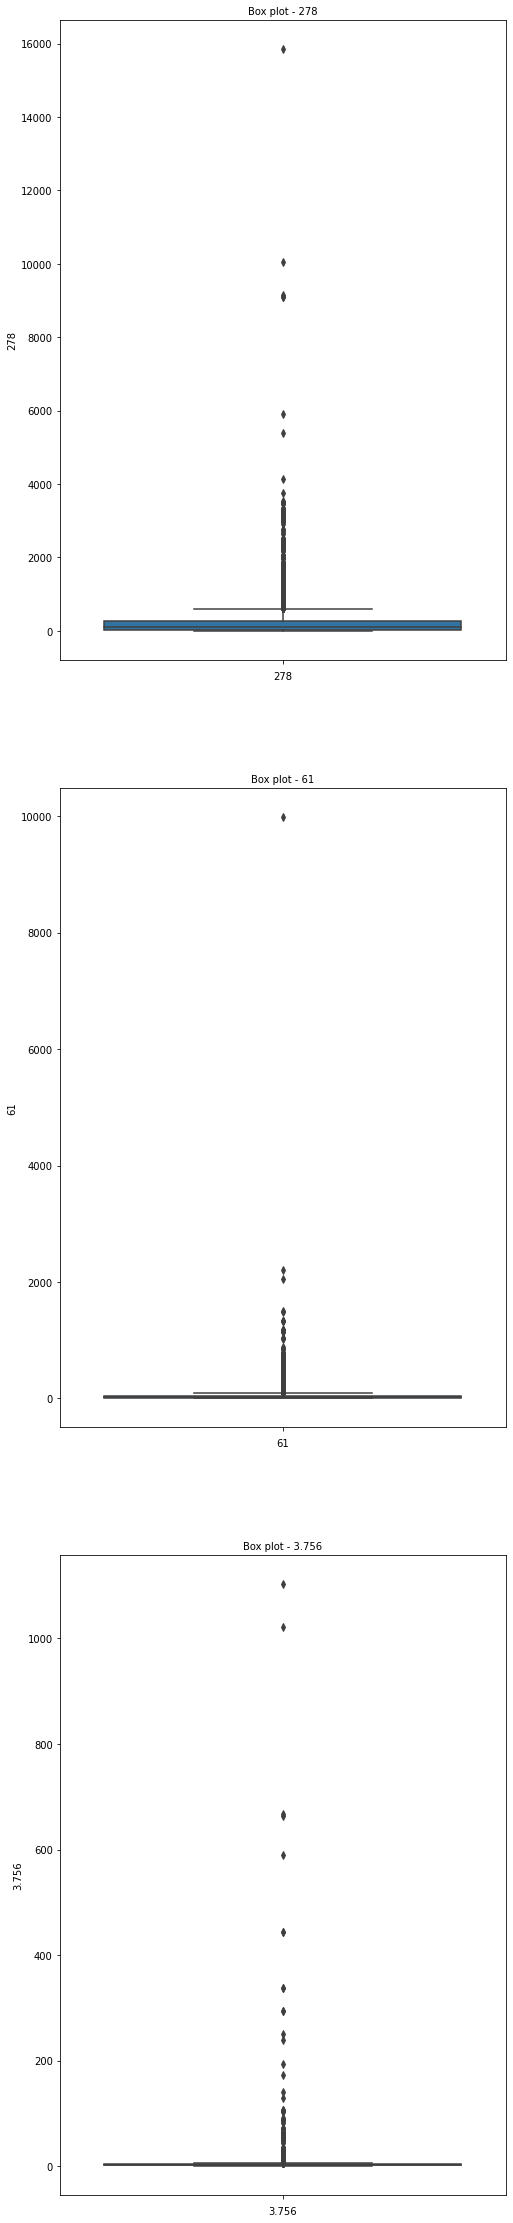

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
col_names = ['278','61','3.756']

fig,ax = plt.subplots(len(col_names),figsize=(8,40))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=spam[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

In [20]:
# Identifying the total number of missing data
spam.isnull().sum().sum()

0

## 6. Exploratory Analysis

###Correlation

In [21]:
# Let's display the correlations between the variables
corr = spam.corr()
corr

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,1.000000,-0.016735,0.065684,0.013270,0.023120,0.059650,0.007647,-0.003970,0.106241,0.041171,0.188441,0.105811,0.066416,0.036768,0.028425,0.059393,0.081906,0.053504,0.128256,0.021282,0.197061,-0.024358,0.134053,0.188143,-0.072530,-0.061710,-0.066443,-0.048698,-0.041264,-0.052817,-0.039079,-0.032069,-0.041028,-0.027701,-0.044969,-0.054692,-0.057338,-0.007965,-0.011148,-0.036110,-0.009712,-0.026083,-0.024308,-0.022126,-0.037128,-0.034071,-0.000958,-0.017763,-0.026517,-0.021235,-0.033313,0.058342,0.117398,-0.008852,0.044488,0.061387,0.089165,0.126323
0.64,-0.016735,1.000000,-0.033579,-0.006920,-0.023761,-0.024815,0.003939,-0.016261,-0.003803,0.032989,-0.006843,-0.040406,-0.018836,-0.009194,0.005344,-0.009123,-0.018348,0.033366,-0.055488,-0.015794,-0.018200,-0.008841,-0.020481,0.001999,-0.043461,-0.038191,-0.030291,-0.029205,-0.021928,-0.027492,-0.018086,-0.003316,-0.024891,-0.004292,-0.024044,-0.028181,-0.023990,-0.008918,-0.019111,-0.014808,-0.015411,-0.025165,-0.002355,-0.019730,-0.016397,-0.023844,-0.009813,-0.015739,-0.007270,-0.049802,-0.018516,-0.014506,-0.009584,0.001953,0.002086,0.000268,-0.022679,-0.030318
0.64.1,0.065684,-0.033579,1.000000,-0.020240,0.077737,0.087624,0.036725,0.012044,0.093843,0.032135,0.048304,0.083197,0.047644,0.008580,0.122150,0.063896,0.036314,0.121665,0.139314,0.031139,0.156641,-0.035665,0.123724,0.041181,-0.087879,-0.062417,-0.108857,-0.050615,-0.057703,-0.032514,-0.038905,-0.061852,-0.054735,-0.061687,-0.048307,-0.046469,-0.066970,0.032418,-0.014782,-0.047040,-0.030939,-0.005784,-0.044296,-0.053448,-0.050621,-0.056628,0.029351,-0.026328,-0.033190,-0.016417,-0.033098,0.108054,0.087671,-0.003320,0.097410,0.107462,0.070119,0.196840
0.1,0.013270,-0.006920,-0.020240,1.000000,0.003238,-0.010018,0.019781,0.010265,-0.002458,-0.004951,-0.012980,-0.019220,-0.013203,0.012006,0.002705,0.007433,0.003467,0.019422,-0.010832,-0.005383,0.008177,0.028101,0.011365,0.035358,-0.015185,-0.013711,-0.010687,-0.010370,-0.007799,-0.010478,-0.007531,-0.006718,-0.008077,-0.006730,-0.006124,-0.006517,-0.007765,-0.002669,-0.004604,-0.007645,-0.005672,-0.008097,-0.009270,-0.005935,-0.012960,-0.009183,-0.003349,-0.001925,-0.000592,-0.012376,-0.007150,-0.003132,0.010859,-0.000299,0.005260,0.022081,0.021369,0.057394
0.32,0.023120,-0.023761,0.077737,0.003238,1.000000,0.054055,0.147338,0.029599,0.020824,0.034497,0.068383,0.066788,0.031127,0.003446,0.056177,0.083024,0.143446,0.062368,0.098510,0.031527,0.136605,-0.020207,0.070039,0.000040,-0.072502,-0.075456,-0.088011,-0.061500,0.032048,-0.052066,-0.042535,-0.026748,-0.031997,-0.026960,-0.049731,-0.048844,-0.072599,0.130812,-0.042044,-0.021442,-0.047505,0.115042,-0.048878,0.015234,-0.042336,-0.077985,-0.026900,-0.032005,-0.032759,-0.046361,-0.026389,0.025509,0.041583,0.002016,0.052662,0.052290,0.002492,0.241958
0.2,0.059650,-0.024815,0.087624,-0.010018,0.054055,1.000000,0.061142,0.079543,0.117416,0.013869,0.053878,0.009272,0.077609,0.009660,0.173055,0.019872,0.064114,0.078547,0.095518,0.058967,0.106844,0.007948,0.211437,0.059314,-0.084430,-0.087296,-0.069070,-0.066242,-0.048686,-0.048145,-0.046396,-0.036847,-0.034178,-0.037327,-0.054331,-0.052838,-0.057491,-0.017923,-0.047633,-0.029880,-0.029466,-0.054826,-0.030632,-0.028837,-0.053661,-0.033061,-0.014349,-0.031702,-0.019131,-0.008745,-0.015145,0.065094,0.105671,0.019887,-0.010282,0.090177,0.082089,0.232741
0.3,0.007647,0.003939,0.036725,0.019781,0.147338,0.061142,1.000000,0.044530,0.050767,0.056787,0.159562,-0.001454,0.013276,-0.022734,0.042892,0.128442,0.187965,0.122202,0.111803,0.046124,0.130804,-0.002101,0.064778,0.030562,-0.089517,-0.080350,-0.065908,-0.066962,-0.048493,-0.058116,-0.046290,-0.040548,-0.041384,-0.040920,-0.053215,-0.053995,-0.052057,-0

###Heatmap

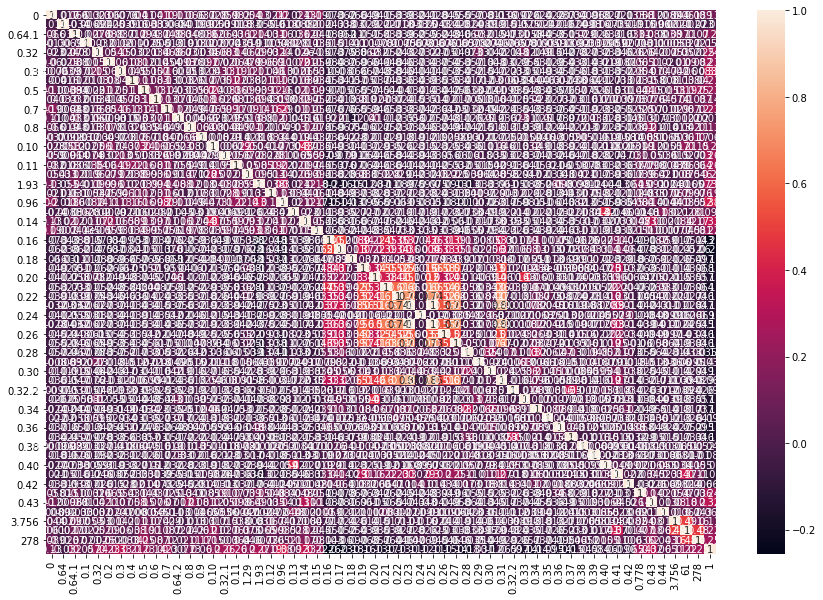

In [23]:
#visualizing correlation on a heatmap
import seaborn as sb
plt.figure(figsize=(15,10))
sb.heatmap(corr, annot = True)
plt.show()

#Naive Bayes Classifier

> Since our dataset has only 2 binary values, we will proceed to use Bernoulli classifier.

In [25]:
# Importing our libraries
# 
import numpy as np
from sklearn.naive_bayes import BernoulliNB

In [30]:
#Dividing the dataset into train and test set
X = spam.iloc[:, :-1].values
y = spam.iloc[:, 57].values

In [31]:
#Step 2:Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
# Fitting our model 
# 
from sklearn.naive_bayes import BernoulliNB

model =BernoulliNB().fit(X_train, y_train)

In [33]:
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8826086956521739


> The accuracy of the model is at 88.2%.

#Using a 70-30 Ratio

In [34]:
#Dividing the dataset into train and test set
X = spam.iloc[:, :-1].values
y = spam.iloc[:, 57].values

In [35]:
#Step 2:Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
# Fitting our model 
# 
from sklearn.naive_bayes import BernoulliNB

model2 =BernoulliNB().fit(X_train, y_train)

In [37]:
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
predicted = model2.predict(X_test)
print(np.mean(predicted == y_test))

0.8797101449275362


> The accuracy seems to reduce to 87.9% from 88.2% after splitting.

#Splitting by 60-40 Ration

In [49]:
#Dividing the dataset into train and test set
X = spam.iloc[:, :-1].values
y = spam.iloc[:, 57].values

In [50]:
#Step 2:Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=69)

In [51]:
# Fitting our model 
# 
from sklearn.naive_bayes import BernoulliNB

model3 =BernoulliNB().fit(X_train, y_train)

In [52]:
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
predicted = model3.predict(X_test)
print(np.mean(predicted == y_test))

0.8755434782608695


>The accuracy reduces further to 87.5 %.

#Naive Bayes Classifier Optimization

### By Normalization

In [57]:
# Load libraries
from sklearn.preprocessing import Normalizer

In [58]:
# Create normalizer
normalizer = Normalizer(norm='l2')

# Transform feature matrix
normalizer.transform(X)

array([[2.03297105e-04, 2.71062806e-04, 4.84040726e-04, ...,
        4.95076854e-03, 9.77762266e-02, 9.95187732e-01],
       [2.59683978e-05, 0.00000000e+00, 3.07292708e-04, ...,
        4.25059392e-03, 2.09911216e-01, 9.77710178e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.81192865e-02, 2.04911354e-01, 9.78451717e-01],
       ...,
       [2.53812946e-03, 0.00000000e+00, 2.53812946e-03, ...,
        1.18784459e-02, 5.07625892e-02, 9.98330921e-01],
       [1.22759766e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.46672345e-02, 6.39373781e-02, 9.97423098e-01],
       [0.00000000e+00, 0.00000000e+00, 1.59858723e-02, ...,
        3.07420620e-02, 1.22968248e-01, 9.83745986e-01]])

In [65]:
#Dividing the dataset into train and test set
X = spam.iloc[:, :-1].values
y = spam.iloc[:, 57].values

In [60]:
#Step 2:Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [61]:
# Fitting our model 
# 
from sklearn.naive_bayes import BernoulliNB

model4 =BernoulliNB().fit(X_train, y_train)

In [62]:
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
predicted = model4.predict(X_test)
print(np.mean(predicted == y_test))

0.8782608695652174


> After Normaliaing the accuracy seem to have improved slightly.

##Removing Redudant/Correlated Features

In [63]:
# Create correlation matrix
corr_matrix = spam.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [64]:
# Drop features 
spam.drop(spam[to_drop], axis=1)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


>There was only one correlated column that has been removed.So we will proceed to see if the accuracy will change after removing the redudant column.

In [70]:
#Dividing the dataset into train and test set
X = spam.iloc[:, :-1].values
y = spam.iloc[:, 57].values

In [71]:
#Step 2:Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [72]:
# Fitting our model 
# 
from sklearn.naive_bayes import BernoulliNB

model5 =BernoulliNB().fit(X_train, y_train)

In [73]:
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
predicted = model5.predict(X_test)
print(np.mean(predicted == y_test))

0.8782608695652174


> The accuracy does not have any significant change. It remains at 88.7 % which is similar to when we noormalized the dataset.

#Recommedations

> More optimization techniques can be tried on to see if the accuracy will improve.


## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?.

 >I feel like this data didnt have sufficient infomation to make anything out of it

### b). Do we need other data to answer our question?

>Yes

### c). Did we have the right question?

No. Our question was'nt clear .